In [1]:
import sys
import os
import matplotlib.pyplot as plt 
import numpy as np 
import rt1plotpy

sys.path.insert(0,os.pardir)

%load_ext autoreload
%autoreload 2   
import rt1raytrace
from  debug_init  import * 

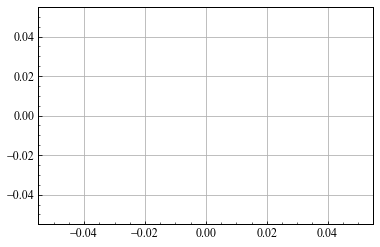

In [2]:
plt.plot([0])

DXF version: AC1021
num of lines:  11
num of circs:  0
num of arcs :  9
DXF version: AC1021
num of lines:  173
num of circs:  0
num of arcs :  45


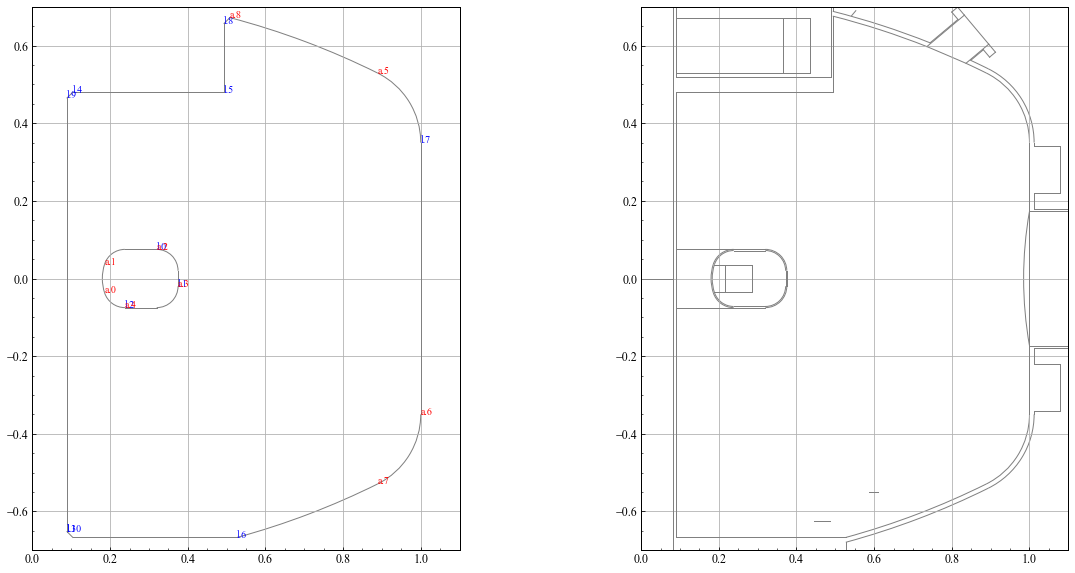

In [3]:
RT1_frame = rt1plotpy.Frame(dxf_file='..\\dxf_files\\simplest0.dxf')
RT1_frame_detail = rt1plotpy.Frame(dxf_file='..\\dxf_files\\main.dxf')

fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].set(**rt1_ax_kwargs)
ax[1].set(**rt1_ax_kwargs)
RT1_frame.append_frame(ax[0],label=True)
RT1_frame_detail.append_frame(ax[1])

In [4]:
focal_length =10.e-3 #[m]
h_length, w_length = 8.2e-3, 8.2e-3 #[m]
h_num   , w_num    = 256   , 256
h_ang0  , w_ang0    = -0.     , 28 #[deg]'..\\dxf_files\\simplest0.dxf'
Z0,R0 =  0.0 , 1.2

RT1_ray = rt1raytrace.Raytrace(dxf_file='..\\dxf_files\\simplest0.dxf')
RT1_ray.set_camera( focal_length =  focal_length        ,
                    image_size    = (h_length, w_length),
                    image_shape   = (h_num   , w_num)   ,
                    location      = (Z0      , R0)      ,
                    center_angles = (h_ang0  , w_ang0)  ,
                    rotation      = 0.00)
                 
N = 4
Lnum = [51,100,100,100]
RT1_ray.main2(N=N,Lmax=3, Lnum=Lnum)

you have to "set_camera()" or "set_angles()" next.

### start 1st raytrace ###


calculating Arcs : 100%|██████████| 9/9 [00:12<00:00,  1.40s/it]


-0.21093 0.05416695362504486


calculating Arcs : 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]


0.029390200000000033 0.015344065795610972


calculating Arcs : 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]


0.0005878040000000251 0.00034630838576891045

### start 2nd raytrace ###


calculating Arcs : 100%|██████████| 9/9 [00:25<00:00,  2.80s/it]


-0.6522979797979799 0.36803975703810815


calculating Arcs : 100%|██████████| 9/9 [00:20<00:00,  2.31s/it]


0.014993470054076363 0.00874872305670116


calculating Arcs : 100%|██████████| 9/9 [00:23<00:00,  2.62s/it]


0.00015144919246568023 8.818651365504246e-05

### start 3rd raytrace ###


calculating Arcs : 100%|██████████| 9/9 [00:22<00:00,  2.50s/it]


-0.2887828282828283 0.4471172480316166


calculating Arcs : 100%|██████████| 9/9 [00:22<00:00,  2.46s/it]


!WARNING!, there are rays without intersection.
0.014993470054076363 0.008737597363342947


calculating Arcs : 100%|██████████| 9/9 [00:21<00:00,  2.37s/it]


!WARNING!, there are rays without intersection.
0.00015144919246545818 8.800296106562507e-05

### start 4th raytrace ###


calculating Arcs : 100%|██████████| 9/9 [00:25<00:00,  2.81s/it]


!WARNING!, there are rays without intersection.
-0.01614646464646465 0.43083292171371174


calculating Arcs : 100%|██████████| 9/9 [00:21<00:00,  2.37s/it]


!WARNING!, there are rays without intersection.
0.014993470054076363 0.008735984861399109


calculating Arcs : 100%|██████████| 9/9 [00:22<00:00,  2.45s/it]


!WARNING!, there are rays without intersection.
0.00015144919246545818 8.869174531633469e-05


In [7]:
RT1_ray.rays[3].correct_no_intersection()

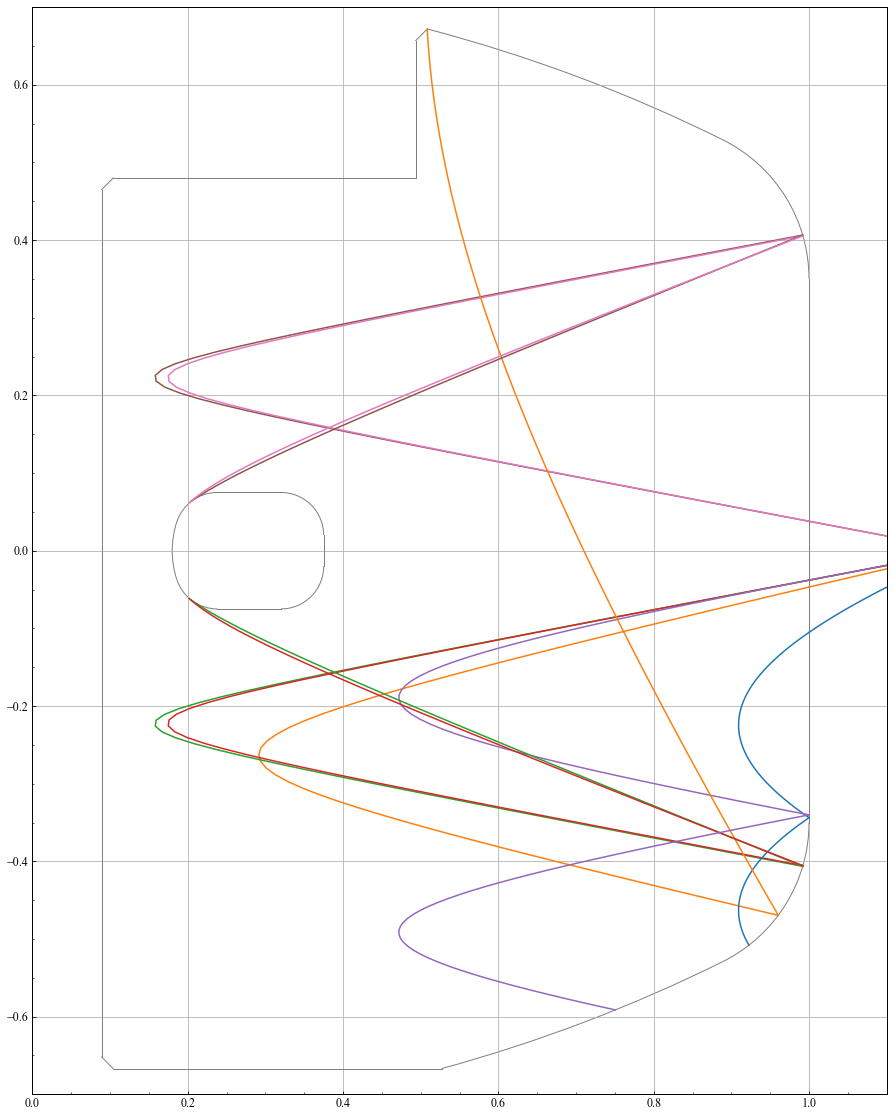

In [8]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(20,20))

hoge = RT1_ray.rays[3].ref_type==-1

RT1_ray.append_frame(ax)
ax.set(**rt1_ax_kwargs)
for n in range(N):
    R,Z=RT1_ray.rays[n].RZ_ray(Lnum=50)
    R = R[:,hoge]
    Z = Z[:,hoge]
    for i in range(R.shape[1]):
        ax.plot(R[:,i],Z[:,i],color=cycle(int(i%10)))

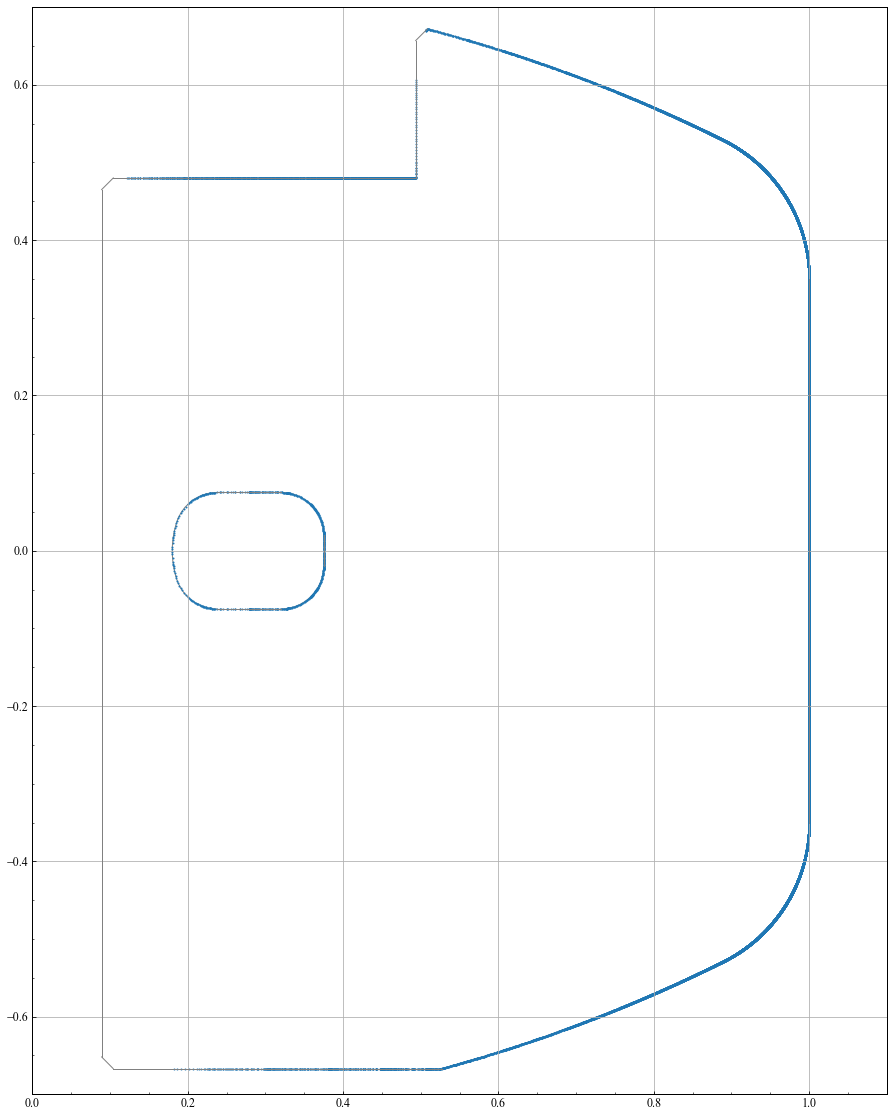

In [9]:
ray = RT1_ray.rays[2]
fig,ax = plt.subplots(figsize=(20,20))
rt1_ax_kwargs = {'xlim'  :(0,1.1),
                'ylim'  :(-0.7,0.7), 
                'aspect': 'equal'
                }
RT1_ray.append_frame(ax)
ax.set(**rt1_ax_kwargs)
R_1st,Z_1st = ray.RZ_ray(Lmax=ray.Length)

ax.scatter(R_1st.flatten(),Z_1st.flatten(),s=1,)
plt.show()

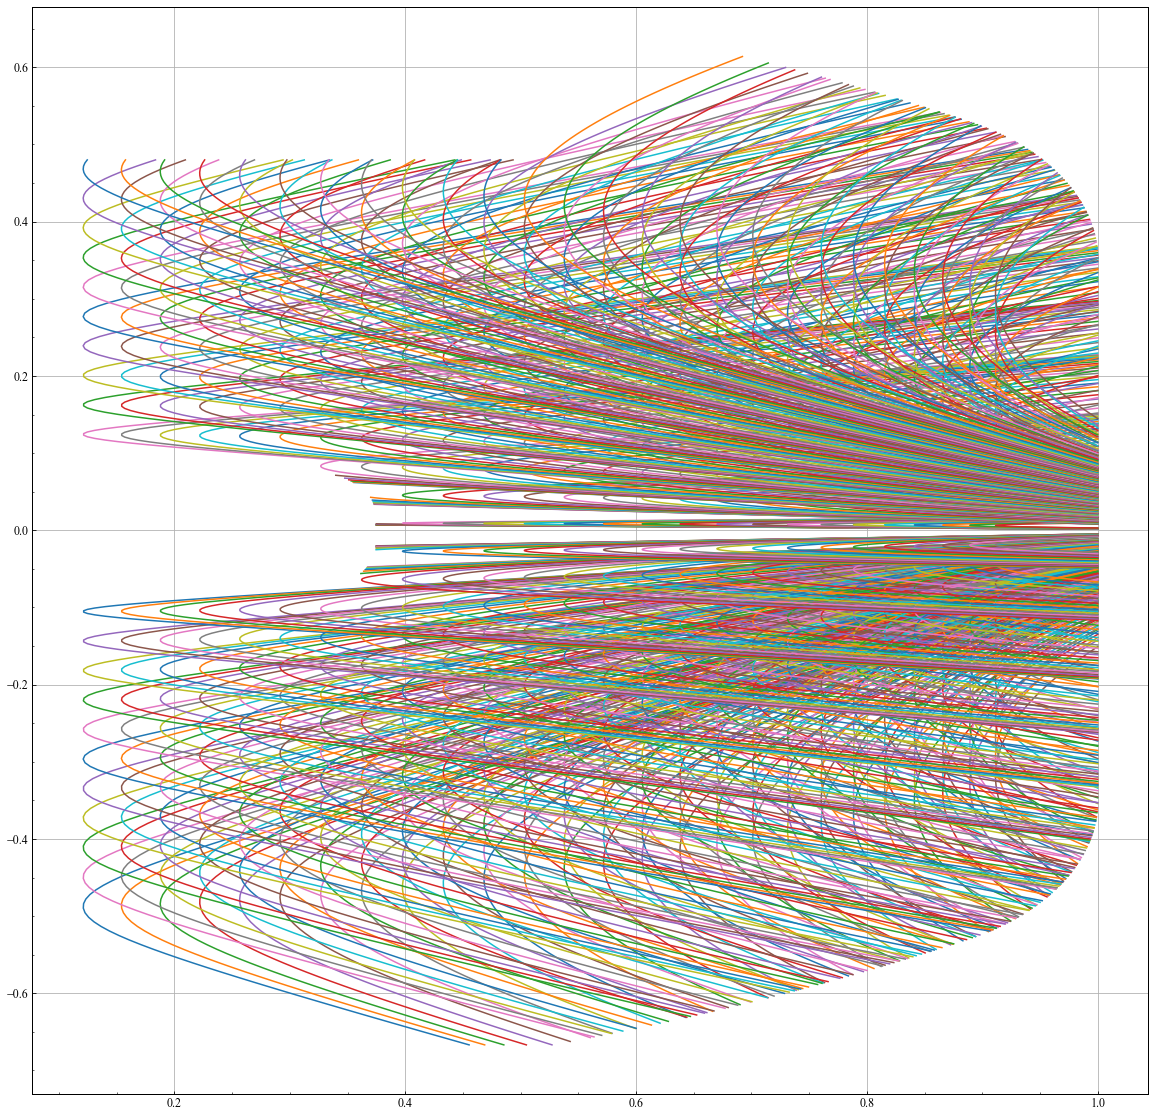

In [10]:
R,Z = RT1_ray.rays[1].RZ_ray(100)

plt.figure(figsize=(20,20))
for i in range(0,256,10):
    for j in range(0,256,10):
        plt.plot(R[:,i,j],Z[:,i,j])

        

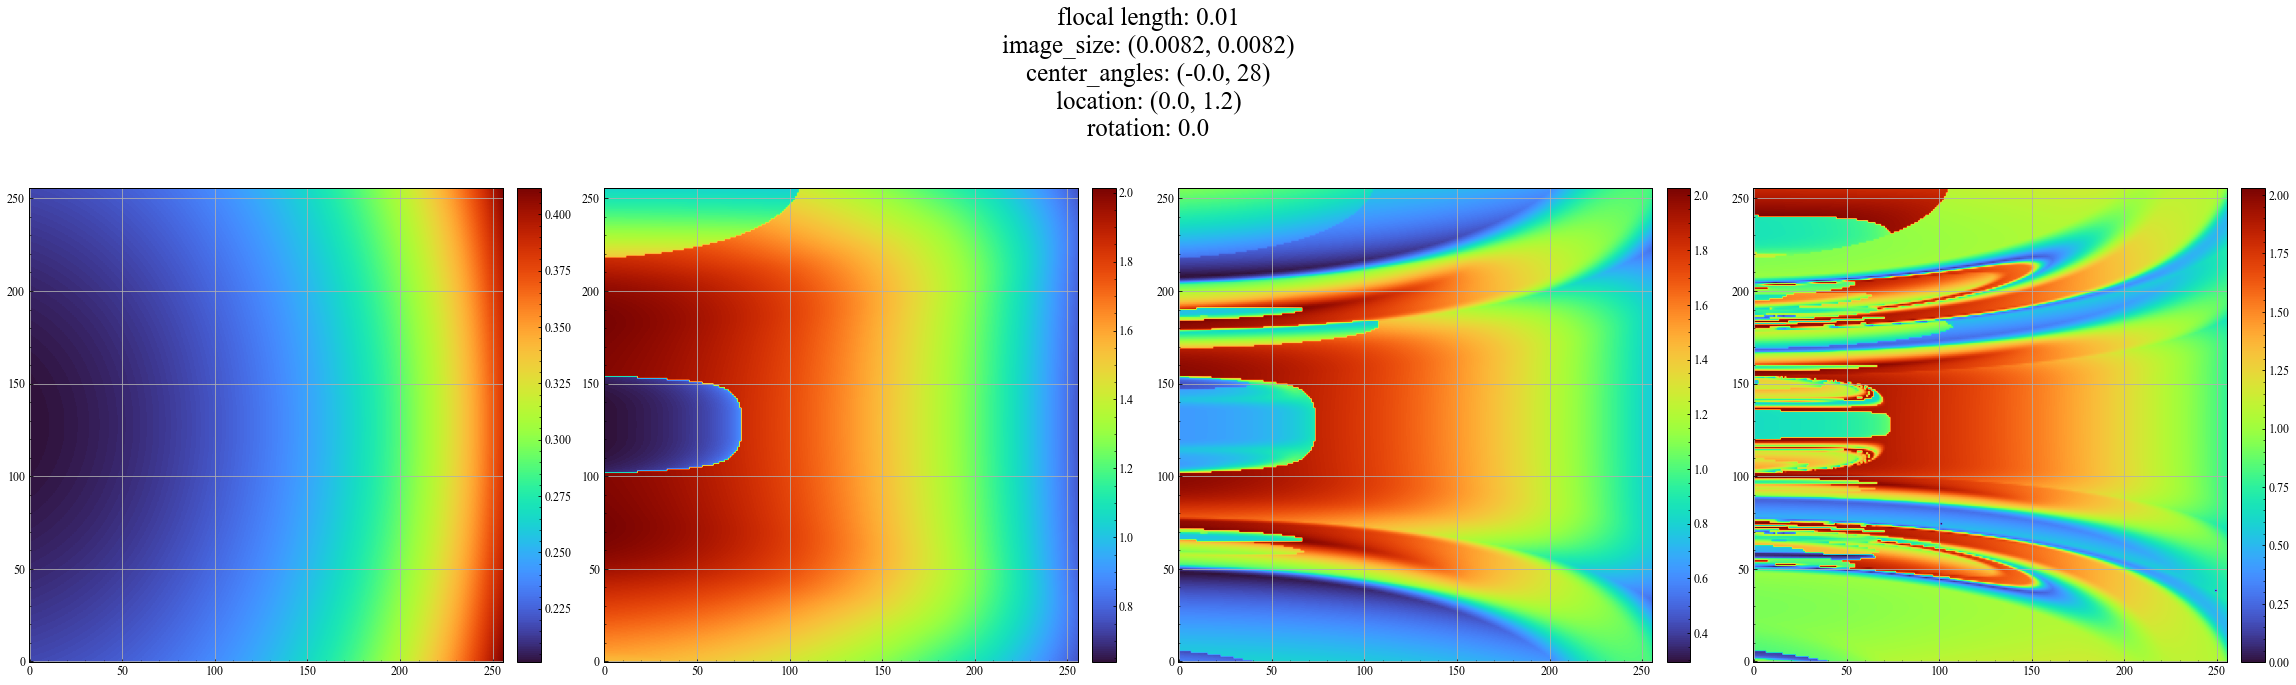

In [23]:
RT1_ray.save_model('model\\test_20220616')